Import necessary packages and files.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

calendar = pd.read_csv('./calendar.csv')
listings = pd.read_csv('listings.csv')
reviews = pd.read_csv('reviews.csv')


Task: Check dataset calendar

Findings:
1) Calendar is a dataset with dates, prices and availability for each apartment. Joins with listing_id if neccessary. Price is not a numeric value!
2) Price is empty for ~33% of rows. Empty only if appartment isn't available.
3) Price only for available appartments.

In [17]:
calendar.head

<bound method NDFrame.head of          listing_id        date available   price
0            241032  2016-01-04         t  $85.00
1            241032  2016-01-05         t  $85.00
2            241032  2016-01-06         f     NaN
3            241032  2016-01-07         f     NaN
4            241032  2016-01-08         f     NaN
...             ...         ...       ...     ...
1393565    10208623  2016-12-29         f     NaN
1393566    10208623  2016-12-30         f     NaN
1393567    10208623  2016-12-31         f     NaN
1393568    10208623  2017-01-01         f     NaN
1393569    10208623  2017-01-02         f     NaN

[1393570 rows x 4 columns]>

In [25]:
calendar_no_nulls = calendar.isnull().mean()
print(calendar_no_nulls)
calendar.info(verbose=True)

listing_id    0.00000
date          0.00000
available     0.00000
price         0.32939
dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


Question 1: How do prices differ within years and months.

Conclusions: 

1) Mean per year doesn't make sense, for 2017 on January data available
2) There is a price high within the summer month, that is obviously the best season to travel to Seattle.

date
2016-01    121.256898
2016-02    123.947429
2016-03    127.963804
2016-04    134.400282
2016-05    138.832159
2016-06    146.771935
2016-07    151.286857
2016-08    149.712349
2016-09    142.285931
2016-10    136.140247
2016-11    134.815529
2016-12    136.306108
2017-01    136.276256
Name: price, dtype: float64
date
2016    137.197846
2017    136.276256
Name: price, dtype: float64


<Axes: xlabel='date'>

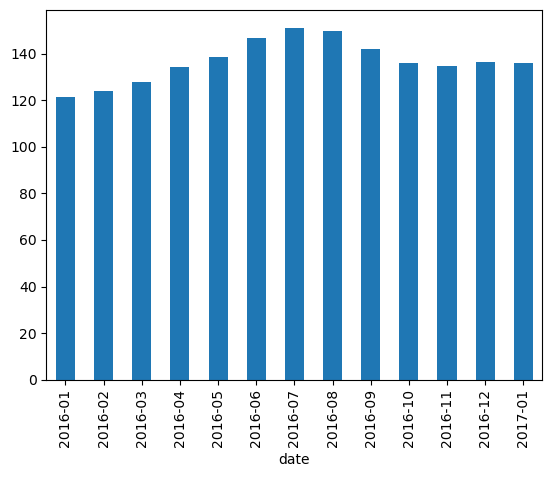

In [47]:
price_per_month = calendar.copy(deep=True)
# remove $ sign
price_per_month['price'].replace(r"\$", "", regex=True, inplace=True)
# cast price into float
price_per_month['price'] = pd.to_numeric(price_per_month['price'], errors='coerce')

# change date to year
price_per_year = price_per_month.copy(deep=True)
price_per_year['date'] = price_per_year['date'].str.slice(0,4)

# change date to month
price_per_month['date'] = price_per_month['date'].str.slice(0,7)

price_per_month = price_per_month.groupby("date")["price"].mean().sort_index(ascending=True)
print(price_per_month)

price_per_year = price_per_year.groupby("date")["price"].mean().sort_index(ascending=True)
print(price_per_year)     
                             
price_per_month.plot(kind="bar")    
                                

Task: Check dataset listings

Findings:

1) Dataset holds all data for flat/house as well as the host
2) Most data in is object type, not many numerical values
3) Price is not numeric!

In [50]:
listings.head
listings_no_nulls = listings.isnull().mean()
print(listings_no_nulls)
listings.info(verbose=True)

id                                  0.000000
listing_url                         0.000000
scrape_id                           0.000000
last_scraped                        0.000000
name                                0.000000
                                      ...   
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
calculated_host_listings_count      0.000000
reviews_per_month                   0.164222
Length: 92, dtype: float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   o

In [14]:
listings.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


Task: Check dataset reviews

Findings:
1) Review holds the reviews for the listings.
2) Reviews are text only, not possible to distinguish good from bad reviews.
3) Each review can be counted as one rent
4) Reviews holds almost no nan values.

In [19]:
reviews.head


<bound method NDFrame.head of        listing_id        id        date  reviewer_id reviewer_name  \
0         7202016  38917982  2015-07-19     28943674        Bianca   
1         7202016  39087409  2015-07-20     32440555         Frank   
2         7202016  39820030  2015-07-26     37722850           Ian   
3         7202016  40813543  2015-08-02     33671805        George   
4         7202016  41986501  2015-08-10     34959538          Ming   
...           ...       ...         ...          ...           ...   
84844     3624990  50436321  2015-10-12     37419458          Ryan   
84845     3624990  51024875  2015-10-17      6933252         Linda   
84846     3624990  51511988  2015-10-20     19543701         Jaime   
84847     3624990  52814482  2015-11-02     24445024        Jørgen   
84848     9727246  56429621  2015-12-13     30860360     Stephanie   

                                                comments  
0      Cute and cozy place. Perfect location to every...  
1      Kell

In [21]:
reviews_no_nulls = reviews.isnull().mean()
print(reviews_no_nulls)

listing_id       0.000000
id               0.000000
date             0.000000
reviewer_id      0.000000
reviewer_name    0.000000
comments         0.000212
dtype: float64


Question 2: Which Neighbourhoods have highest rating?

Conclusions:
1) Top 3 for locations are Capitol Hill, Downtown and Ballard
2) Top 3 for overall rating are Central, West Seattle and Delridge

In [3]:
compare_location_score = listings.groupby(["neighbourhood_group_cleansed"])["review_scores_location"].mean().sort_values(ascending=False)
print(compare_location_score)

neighbourhood_group_cleansed
Capitol Hill           9.823529
Downtown               9.769737
Ballard                9.766839
West Seattle           9.765432
Queen Anne             9.751020
Other neighborhoods    9.637481
Magnolia               9.617021
Cascade                9.569231
Central Area           9.489028
Northgate              9.353846
Seward Park            9.282051
Lake City              9.267857
University District    9.252632
Delridge               9.200000
Interbay               9.111111
Beacon Hill            9.097087
Rainier Valley         9.052239
Name: review_scores_location, dtype: float64


In [4]:
compare_overall_score = listings.groupby(["neighbourhood_group_cleansed"])["review_scores_rating"].mean().sort_values(ascending=False)
print(compare_overall_score)

neighbourhood_group_cleansed
Central Area           96.009404
West Seattle           95.864198
Delridge               95.861538
Ballard                95.533679
Queen Anne             95.443089
Seward Park            95.025641
Rainier Valley         94.731343
Northgate              94.692308
Other neighborhoods    94.562500
Lake City              94.375000
Capitol Hill           94.184783
Beacon Hill            94.019417
Downtown               93.958333
Magnolia               93.787234
Interbay               93.777778
Cascade                92.461538
University District    88.437500
Name: review_scores_rating, dtype: float64


Question 3: Which neighbourhoods have the lowest prices

Conclusion:
1) Delridge, Northgate and Rainier Valley have the top3 lowest prices
2) Price per person is hard to calculate because of different amount of persons which are included in standard price.

In [55]:
# Price is not a number, create a subset and remove $
listings_price = listings[['id', 'price', 'neighbourhood_group_cleansed','accommodates']]
listings_price['price'].astype('string')

#remove $
listings_price['price'].replace(r"\$", "", regex=True, inplace=True)

#remove 1000 separation (not needed, codes works)
#listings_price['price'].replace(r",", "", regex=True, inplace=True)

#cast price into float
listings_price['price'] = pd.to_numeric(listings_price['price'], errors='coerce')

##for debugging 
#listings_price.info(verbose=True)
#print(listings_price)

compare_price_neighbourhood = listings_price.groupby(["neighbourhood_group_cleansed"])["price"].mean().sort_values(ascending=True)
print(compare_price_neighbourhood)


neighbourhood_group_cleansed
Delridge                83.278481
Northgate               88.550000
Rainier Valley          91.899371
Lake City               92.671642
University District     93.639344
Beacon Hill             94.669492
Seward Park            108.477273
Interbay               109.727273
Other neighborhoods    118.858764
Ballard                124.682609
Central Area           128.338753
Capitol Hill           130.592593
Cascade                140.101124
West Seattle           141.359606
Downtown               154.405660
Queen Anne             157.223729
Magnolia               177.672131
Name: price, dtype: float64


C:\Users\q276528\AppData\Local\Temp\ipykernel_18820\4279950378.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_price['price'].replace(r"\$", "", regex=True, inplace=True)
C:\Users\q276528\AppData\Local\Temp\ipykernel_18820\4279950378.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_price['price'] = pd.to_numeric(listings_price['price'], errors='coerce')


Question 4: Which neighbourhoods have the most listings?

Conclusions:
1) The most listings are within the sum up "Other neighborhoods"
2) From the "real values" Capitol Hill, Downtown and Central Area are the top 3

neighbourhood_group_cleansed
Other neighborhoods    794
Capitol Hill           567
Downtown               530
Central Area           369
Queen Anne             295
Ballard                230
West Seattle           203
Rainier Valley         159
University District    122
Beacon Hill            118
Cascade                 89
Northgate               80
Delridge                79
Lake City               67
Magnolia                61
Seward Park             44
Interbay                11
Name: id, dtype: int64


<Axes: xlabel='neighbourhood_group_cleansed'>

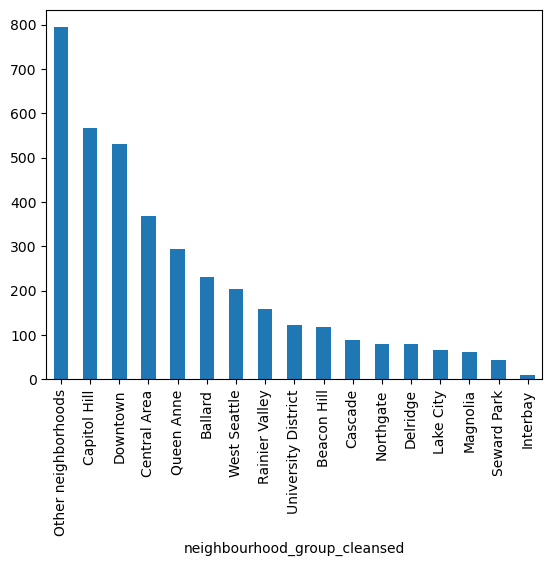

In [24]:
count_listings = listings.groupby(["neighbourhood_group_cleansed"])["id"].count().sort_values(ascending=False)
print(count_listings)

# Plot a bar chart
count_listings.plot(kind="bar")

Question 5: So where should I stay if I visit Seattle? I want the best value for money

Conclusions:
1) If I choose by the overall rating the best place to stay is Delridge with the lowest prices but the 3rd best over all rating
2) If i choose by the location rating only there is only good location & expensive or not so good location & cheap. I would prefer Capitol Hill because of the best location score and an almost mean price
3) Because location is not everything and because I prefer staying longer compared to staying "expensive" I would prefer Delridge.

In [21]:
# Put prices and scoring into one dataset
result_price = pd.concat([compare_overall_score, compare_price_neighbourhood], axis=1)

##debug
#print(compare_overall_score)
compare_overall_score.info(verbose=True)

test.info(verbose=True)
print(result_price)


<class 'pandas.core.series.Series'>
Index: 17 entries, Central Area to University District
Series name: review_scores_rating
Non-Null Count  Dtype  
--------------  -----  
17 non-null     float64
dtypes: float64(1)
memory usage: 272.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Central Area to University District
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   review_scores_rating  17 non-null     float64
 1   price                 17 non-null     float64
dtypes: float64(2)
memory usage: 408.0+ bytes
                              review_scores_rating       price
neighbourhood_group_cleansed                                  
Central Area                             96.009404  128.338753
West Seattle                             95.864198  141.359606
Delridge                                 95.861538   83.278481
Ballard                                  95.533679  124.682609
Quee

Create a quadrant chart for all neighbourhoods

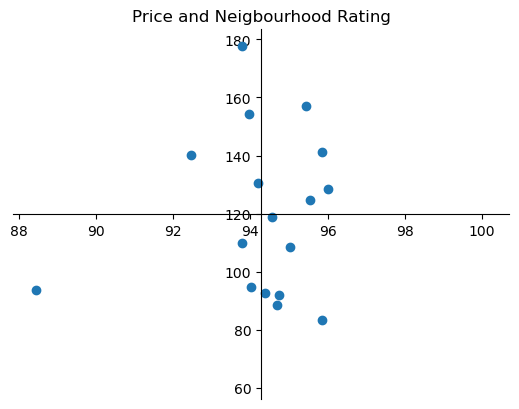

In [22]:
plt.plot(result_price["review_scores_rating"], result_price["price"], "o")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_position(("data", result_price["review_scores_rating"].mean()))
plt.gca().spines["bottom"].set_position(("data", result_price["price"].mean()))

plt.gca().mode='markers+text'

plt.gca().set_title("Price and Neigbourhood Rating")
#plt.gca().set_xlabel("Neigbourhood Rating")
#plt.gca().set_ylabel("Price")

def get_lims(result_price, column, w=0.1):
    mean = result_price[column].mean()
    max_diff = max(
        abs(result_price[column].max() - mean),
        abs(result_price[column].min() - mean),
    )
    return [mean - max_diff - max_diff * w, mean + max_diff + max_diff * w]

plt.xlim(get_lims(result_price, "review_scores_rating"))
plt.ylim(get_lims(result_price, "price"))
plt.show()


In [51]:
result_price_location = pd.concat([compare_location_score, compare_price_neighbourhood], axis=1)

result_price_location.info(verbose=True)
print(result_price_location)

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Capitol Hill to Rainier Valley
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   review_scores_location  17 non-null     float64
 1   price                   17 non-null     float64
dtypes: float64(2)
memory usage: 408.0+ bytes
                              review_scores_location       price
neighbourhood_group_cleansed                                    
Capitol Hill                                9.823529  130.592593
Downtown                                    9.769737  154.405660
Ballard                                     9.766839  124.682609
West Seattle                                9.765432  141.359606
Queen Anne                                  9.751020  157.223729
Other neighborhoods                         9.637481  118.858764
Magnolia                                    9.617021  177.672131
Cascade                              

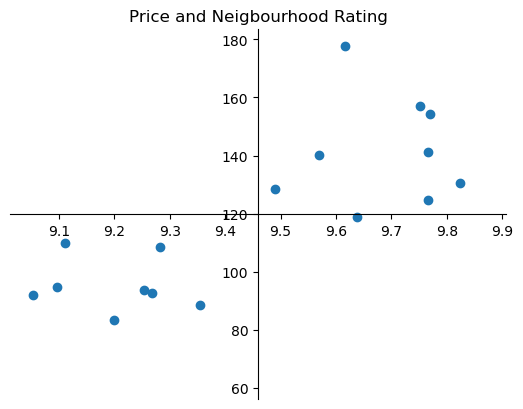

In [54]:
plt.plot(result_price_location["review_scores_location"], result_price_location["price"], "o")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["left"].set_position(("data", result_price_location["review_scores_location"].mean()))
plt.gca().spines["bottom"].set_position(("data", result_price_location["price"].mean()))

plt.gca().mode='markers+text'

plt.gca().set_title("Price and Neigbourhood Rating")
#plt.gca().set_xlabel("Neigbourhood Rating")
#plt.gca().set_ylabel("Price")

def get_lims(result_price_location, column, w=0.1):
    mean = result_price_location[column].mean()
    max_diff = max(
        abs(result_price_location[column].max() - mean),
        abs(result_price_location[column].min() - mean),
    )
    return [mean - max_diff - max_diff * w, mean + max_diff + max_diff * w]

plt.xlim(get_lims(result_price_location, "review_scores_location"))
plt.ylim(get_lims(result_price_location, "price"))
plt.show()

Task: Try to put a model on the categorical datas

Conclusions:
1) With all categorical columnns we get way to many columns in the dataset
2) With only the "amenities" the dummy columns doens't work properly because it has multiple values within a list
3) Stop here because we already answered five questions and spent to much time

In [17]:
# We want to predict the satisfaction as well as the price. 

#Pull a list of the column names of the categorical variables
#Only use quant variables and drop any rows with missing values
cat_df = listings[['amenities']]
cat_cols_lst = cat_df.columns

def create_dummy_df(df, cat_cols, dummy_na):
    '''
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            1. contains all columns that were not specified as categorical
            2. removes all the original columns in cat_cols
            3. dummy columns for each of the categorical columns in cat_cols
            4. if dummy_na is True - it also contains dummy columns for the NaN values
            5. Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_new = create_dummy_df(listings, cat_cols_lst, dummy_na=False) #Use your newly created function

# Show a header of df_new to check
print(df_new.shape)
print(df_new.head)




(3818, 3374)
<bound method NDFrame.head of             id                            listing_url       scrape_id  \
0       241032    https://www.airbnb.com/rooms/241032  20160104002432   
1       953595    https://www.airbnb.com/rooms/953595  20160104002432   
2      3308979   https://www.airbnb.com/rooms/3308979  20160104002432   
3      7421966   https://www.airbnb.com/rooms/7421966  20160104002432   
4       278830    https://www.airbnb.com/rooms/278830  20160104002432   
...        ...                                    ...             ...   
3813   8101950   https://www.airbnb.com/rooms/8101950  20160104002432   
3814   8902327   https://www.airbnb.com/rooms/8902327  20160104002432   
3815  10267360  https://www.airbnb.com/rooms/10267360  20160104002432   
3816   9604740   https://www.airbnb.com/rooms/9604740  20160104002432   
3817  10208623  https://www.airbnb.com/rooms/10208623  20160104002432   

     last_scraped                                 name  \
0      2016-01-04     